<a href="https://colab.research.google.com/github/mehang/Improvised-CNN/blob/master/notebook/LogGabor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install NeuroTools

     |████████████████████████████████| 174kB 7.2MB/s 
  Created wheel for NeuroTools: filename=NeuroTools-0.3.1-cp36-none-any.whl size=120978 sha256=bc30bc545034e7adf835ea05984d790e706ab63b081b74cc57233c846e61eeb6
  Stored in directory: /root/.cache/pip/wheels/15/a0/b8/d9a594c2a83d0d4f19bf28673a2df51f374f2f2a9360e43f69
Successfully built NeuroTools


In [9]:
pip install SLIP

  Using cached https://files.pythonhosted.org/packages/5f/65/fd79088e1810675c8934703cfe7d7bd34190c0a5a2a621252e785b8e6802/SLIP-20191113.tar.gz
  Created wheel for SLIP: filename=SLIP-20191113-cp36-none-any.whl size=20491 sha256=245ebd89e90da14b9ecd2b071b6a48380eb2679248a3f66a233c2f347fc59e8b
  Stored in directory: /root/.cache/pip/wheels/48/fc/c2/7a86f1ae273676e2d39ad715fc2826273b8af2c1c6e9f58ca7
Successfully built SLIP


In [11]:
pip install LogGabor

  Using cached https://files.pythonhosted.org/packages/1f/cd/83ba211d84ae54353bfe4973b88007c6ba4a082b5a8558852986fcf91e09/LogGabor-20191113.tar.gz
  Created wheel for LogGabor: filename=LogGabor-20191113-cp36-none-any.whl size=9125 sha256=a6c29360f1f73f59582d063c27ad546b91c0e08331dfd3c3d87046720ef6945b
  Stored in directory: /root/.cache/pip/wheels/3c/55/ab/3e3d7b73f0ae8592c78f2b9fc711cbda9de033973cd2ae63dd
Successfully built LogGabor


In [12]:
%load_ext autoreload
%autoreload 2
from LogGabor import LogGabor
parameterfile = 'https://raw.githubusercontent.com/bicv/LogGabor/master/default_param.py'
lg = LogGabor(parameterfile)

In [13]:
import os
import numpy as np
np.set_printoptions(precision=2, suppress=True)
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
figpath = '/tmp'
figpath = './figures/'
figpath = '../Perrinet2015BICV_sparse/figures'
figpath = None
fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
#fig_width_pt = 900
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt

(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)


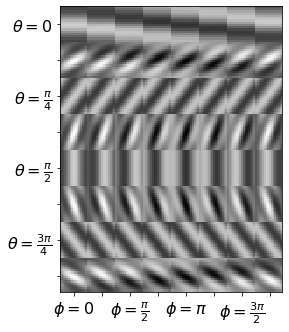

In [52]:
%matplotlib inline
# where should we store the figures generated by this notebook
phi = (np.sqrt(5)+1) / 2
fig = plt.figure(figsize=(fig_width, fig_width))
border = 0.2
a = fig.add_axes((border, border*.5, .9-border, 1.-border*.5), facecolor='w')
a.axis(c='b', lw=0)

N_X_gabor = 16
lg = LogGabor(parameterfile)
lg.set_size((N_X_gabor, N_X_gabor))
samples = 8
image_gabor = np.zeros((N_X_gabor*samples, N_X_gabor*samples))
for i in range(samples):
    for j in range(samples):
        #params = {'sf_0':2**(2*j)/128., 'B_sf':pe.B_sf, 'theta':i*np.pi/4, 'B_theta':pe.B_theta}
        params = {'sf_0':1./16, 'B_sf':lg.pe.B_sf, 'theta':i*np.pi/samples, 'B_theta':lg.pe.B_theta}
        # loggabor takes as args: u, v, sf_0, B_sf, theta, B_theta)
        FT_lg = lg.loggabor(N_X_gabor/2, N_X_gabor/2, **params)
        image_temp = lg.invert(FT_lg * np.exp(-1j*2*np.pi*j/samples))
        print(image_temp.shape)
        image_gabor[(i*N_X_gabor):(i*N_X_gabor+N_X_gabor), (j*N_X_gabor):(j*N_X_gabor+N_X_gabor)] = image_temp
        
image_gabor /= np.abs(image_gabor).max()
lg.set_size(image_gabor)
fig, a = lg.imshow(image_gabor, fig=fig, ax=a)
a.set_xticks(np.arange(samples)*N_X_gabor + N_X_gabor/2)
a.set_xticklabels([r'$\phi=0$', '', r'$\phi=\frac{\pi}{2}$', '', r'$\phi=\pi$', '', r'$\phi=\frac{3\pi}{2}$'], fontsize=16)
a.set_yticks(np.arange(samples)*N_X_gabor + N_X_gabor/2)
a.set_yticklabels([r'$\theta=0$', '', r'$\theta=\frac{\pi}{4}$', '', r'$\theta=\frac{\pi}{2}$', '', r'$\theta=\frac{3\pi}{4}$'], fontsize=16)
a.grid(False)
if not(figpath is None): lg.savefig(fig, 'fig_log_gabor_filters_A', figpath=figpath)

Mean intensity:  0.49790577590465546  - standard deviation:  0.18207926399098728


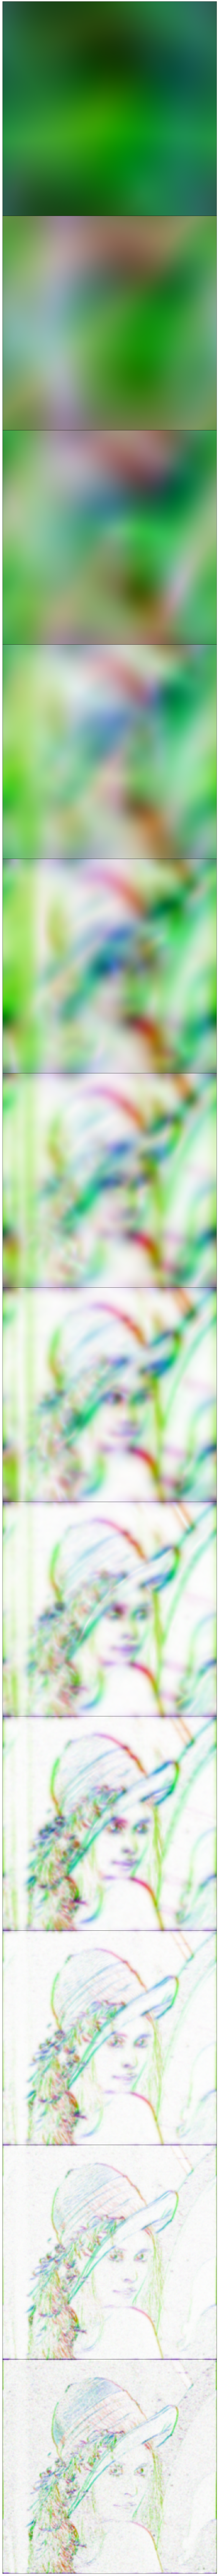

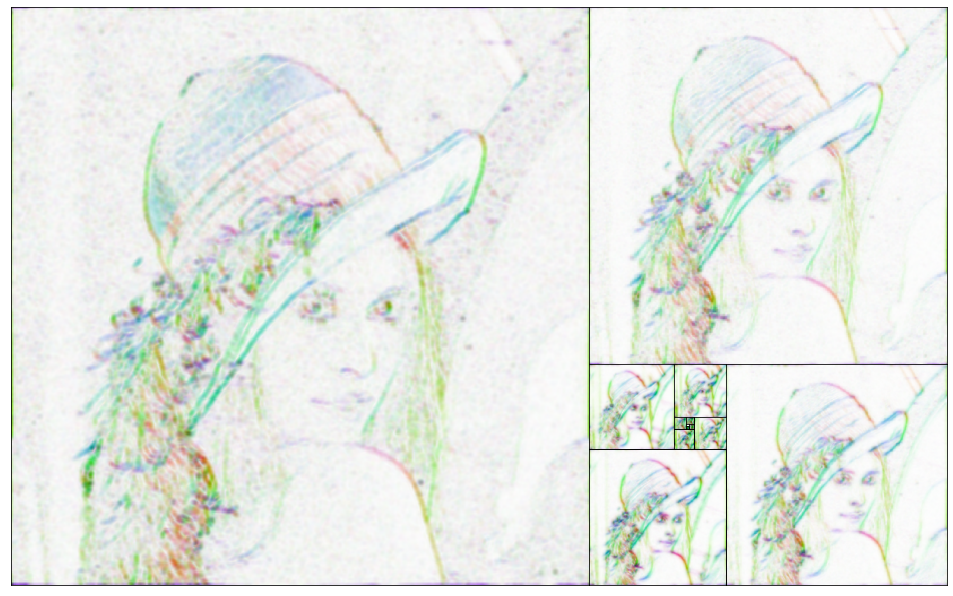

In [18]:
from LogGabor import imread

image = imread('https://github.com/bicv/SLIP/raw/master/database/yelmo512.png')
image = imread('https://github.com/bicv/SLIP/raw/master/database/lena512.png')
#image = image[:image.shape[0]//2, :] # to test that i works with rectangular images 
# image = image[:, :image.shape[1]//2] # to test that i works with rectangular images 
print('Mean intensity: ', image.mean(), ' - standard deviation: ', image.std())

opts= {'vmin':0., 'vmax':1., 'interpolation':'nearest', 'origin':'upper'}

lg = LogGabor(parameterfile)
lg.set_size(image)
phi = (np.sqrt(5) +1.)/2. # golden number
lg.pe.base_levels = phi
lg.init()

C = lg.linear_pyramid(image)

# uncomment to test a raveled representation:
#fig, axs = lg.golden_pyramid(C, mask=False, spiral=False, fig_width=13)
#plt.show()
fig, axs = lg.golden_pyramid(C, mask=False, spiral=True, fig_width=13)

if not(figpath is None): lg.savefig(fig, 'fig_log_gabor_filters_B', figpath=figpath)

In [29]:
fx,fy = np.mgrid[(-4//2):(4+1)//2, (-5//2):(5+1)//2]

In [30]:
fx**2

array([[4, 4, 4, 4, 4, 4],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1]])

In [33]:
r = fx**2+fy**2

In [34]:
r[(4+1)//2, (5+1)//2] = 1e-12

In [35]:
r

array([[13,  8,  5,  4,  5,  8],
       [10,  5,  2,  1,  2,  5],
       [ 9,  4,  1,  0,  1,  4],
       [10,  5,  2,  1,  2,  5]])

In [36]:
fx**2+fy**2

array([[13,  8,  5,  4,  5,  8],
       [10,  5,  2,  1,  2,  5],
       [ 9,  4,  1,  0,  1,  4],
       [10,  5,  2,  1,  2,  5]])

In [37]:
r[(4+1)//2, (5+1)//2]

0

In [39]:
np.arctan2(fy, fx)


array([[-2.16, -2.36, -2.68,  3.14,  2.68,  2.36],
       [-1.89, -2.03, -2.36,  3.14,  2.36,  2.03],
       [-1.57, -1.57, -1.57,  0.  ,  1.57,  1.57],
       [-1.25, -1.11, -0.79,  0.  ,  0.79,  1.11]])

In [40]:
fx

array([[-2, -2, -2, -2, -2, -2],
       [-1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1]])

In [41]:
fy

array([[-3, -2, -1,  0,  1,  2],
       [-3, -2, -1,  0,  1,  2],
       [-3, -2, -1,  0,  1,  2],
       [-3, -2, -1,  0,  1,  2]])

In [44]:
np.exp(-1j)

(0.5403023058681398-0.8414709848078965j)

In [46]:
np.exp(1)

2.718281828459045

In [47]:
np.cos(-1)

0.5403023058681398